In [ ]:
#This is the Alice Bob Charlie experiment 

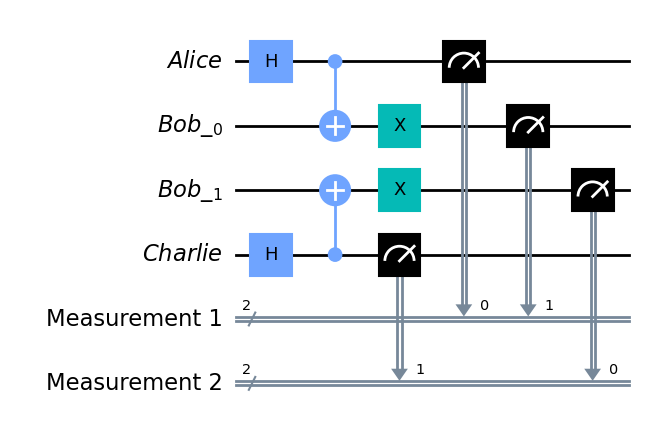

In [117]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble, execute

# Create named quantum registers for Alice, Bob, and Charlie
alice = QuantumRegister(1, "Alice")
bobs = QuantumRegister(2, "Bob_")
charlie = QuantumRegister(1, "Charlie")

# Create a classical register for measurement outcomes

cr1 = ClassicalRegister(2, "Measurement 1")
cr2 = ClassicalRegister(2, "Measurement 2")

# Create a quantum circuit with three qubits for Alice, Bob, and Charlie
qc = QuantumCircuit(alice, bobs, charlie, cr1, cr2)

# Make Alice and Charlie superposition
qc.h(alice)
qc.h(charlie)

# Entangle Alice and Bob
qc.cx(alice, bobs[0])

# Entangle Bob and Charlie
qc.cx(charlie, bobs[1])

#Ensuring that the measurements of bob is the opposite of alice and charlie
qc.x(bobs[0])
qc.x(bobs[1])

# Alice measures her qubit
qc.measure(alice, 0)

# Bob measures his qubit 
qc.measure(bobs[0], 1)

# Bob measures his qubit
qc.measure(bobs[1], 2)

# Charlie measures his qubit in the X-basis (Hadamard basis)
qc.measure(charlie, 3)

# Display the quantum circuit
qc.draw('mpl')





In [120]:
# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = execute(qc, simulator).result()

# Get and print the measurement outcomes
counts = result.get_counts(qc)
print("AB CB: Value")
for key, value in counts.items():
    print(f"{key}: {value}")
print("Measurement outcomes:", counts)


AB CB: Value
10 10: 224
10 01: 257
01 01: 272
01 10: 271
Measurement outcomes: {'10 10': 224, '10 01': 257, '01 01': 272, '01 10': 271}


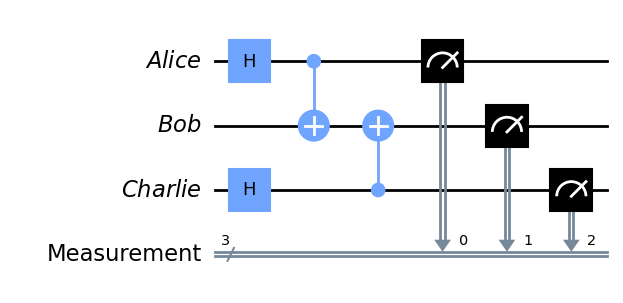

In [78]:
qc.draw("mpl")